<a href="https://colab.research.google.com/github/BackBenchDreamer/AAMWS/blob/main/AAMWS_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import os

# File path and wind speeds
file_path = "/content/drive/MyDrive/Research/AAMWS_v2/Resources/"
wind_speeds = [10, 12, 14, 15, 17, 19]
sample_size = 10000  # Extract only 10k rows

# Dictionary to store data
datasets = {}

# Load and inspect datasets
for speed in wind_speeds:
    file_name = f"{speed}msdl.xlsx"
    full_path = os.path.join(file_path, file_name)

    # Read the Excel file
    df = pd.read_excel(full_path, sheet_name="Data1")

    # Extract only 10k rows
    df_sample = df.head(sample_size)

    # Check for missing values
    missing_values = df_sample.isnull().sum().sum()

    # Store in dictionary
    datasets[speed] = df_sample

    print(f"Wind Speed {speed} m/s | Shape: {df_sample.shape} | Missing Values: {missing_values}")

# Display a small sample from one dataset
print("\nSample Data from 10 m/s:")
print(datasets[10].head(5))


Mounted at /content/drive
Wind Speed 10 m/s | Shape: (10000, 2) | Missing Values: 0
Wind Speed 12 m/s | Shape: (10000, 2) | Missing Values: 0
Wind Speed 14 m/s | Shape: (10000, 2) | Missing Values: 0
Wind Speed 15 m/s | Shape: (10000, 2) | Missing Values: 0
Wind Speed 17 m/s | Shape: (10000, 2) | Missing Values: 0
Wind Speed 19 m/s | Shape: (10000, 2) | Missing Values: 0

Sample Data from 10 m/s:
      Time    AI 3/s
0        s         m
1  6.21115 -0.000013
2   6.2112 -0.000013
3  6.21125 -0.000013
4   6.2113 -0.000013


Wind Speed 10 m/s | Shape: (10000, 2) | Missing Values: 2
Wind Speed 12 m/s | Shape: (10000, 2) | Missing Values: 2
Wind Speed 14 m/s | Shape: (10000, 2) | Missing Values: 2
Wind Speed 15 m/s | Shape: (10000, 2) | Missing Values: 2
Wind Speed 17 m/s | Shape: (10000, 2) | Missing Values: 2
Wind Speed 19 m/s | Shape: (10000, 2) | Missing Values: 2


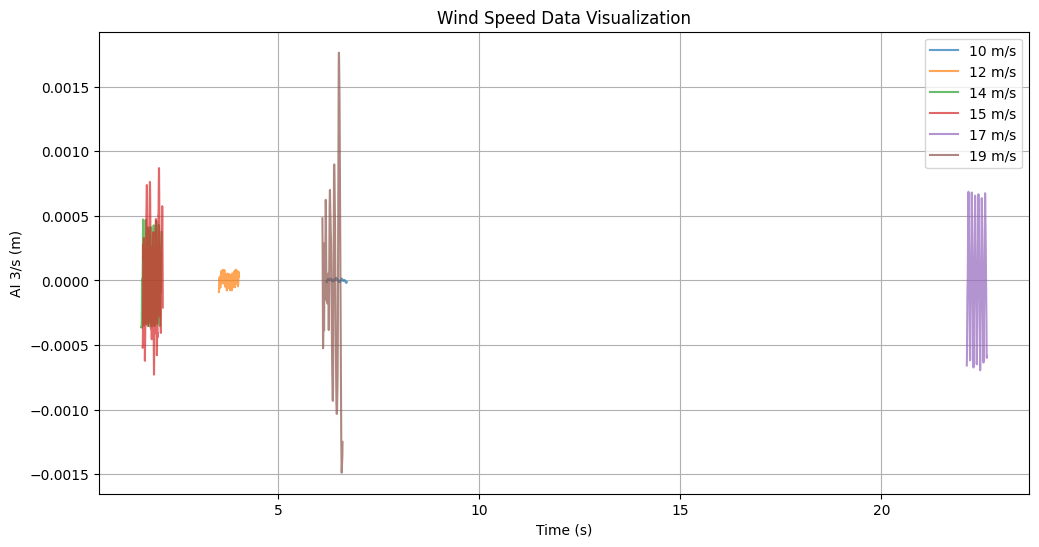

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# File path and wind speeds
file_path = "/content/drive/MyDrive/Research/AAMWS_v2/Resources/"
wind_speeds = [10, 12, 14, 15, 17, 19]
sample_size = 10000  # Extract only 10k rows

# Dictionary to store data
datasets = {}

# Load and inspect datasets
for speed in wind_speeds:
    file_name = f"{speed}msdl.xlsx"
    full_path = os.path.join(file_path, file_name)

    # Read the Excel file
    df = pd.read_excel(full_path, sheet_name="Data1")

    # Rename columns to remove hidden characters
    df.columns = df.columns.str.strip()

    # Convert columns to numeric (force errors to NaN for debugging)
    df["Time"] = pd.to_numeric(df["Time"], errors="coerce")
    df["AI 3/s"] = pd.to_numeric(df["AI 3/s"], errors="coerce")

    # Extract only 10k rows
    df_sample = df.head(sample_size)

    # Check for missing values after conversion
    missing_values = df_sample.isnull().sum().sum()

    # Store in dictionary
    datasets[speed] = df_sample

    print(f"Wind Speed {speed} m/s | Shape: {df_sample.shape} | Missing Values: {missing_values}")

# Plot the datasets
plt.figure(figsize=(12, 6))

for speed, df in datasets.items():
    # Drop NaN values just in case
    df = df.dropna()
    plt.plot(df["Time"], df["AI 3/s"], label=f"{speed} m/s", alpha=0.7)

plt.xlabel("Time (s)")
plt.ylabel("AI 3/s (m)")
plt.title("Wind Speed Data Visualization")
plt.legend()
plt.grid()
plt.show()
